In [1]:
import numpy as np
import json
import os.path
import os
import csv
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
%matplotlib inline

## Data Pre-processing

Each training image has an associated file with the labels for each task in the competition. For image classification purposes, we only care about task1. Therefore, the first step is to create a CSV file with the pairs *image_id, chart_type* to feed a classifier.
https://chartinfo.github.io/
https://github.com/adobe-research/CHART-Synthetic

In [2]:
ROOT_DIR = '../train_json_gt/json_gt/'
TASK1_FILEPATH = './labels_task1.csv'
IMAGES_DIR = '/chart/images/'

In [3]:
def get_task1_info(fpath):
    'Return the image id from the filename and the chart_type from'
    'the data file'
    with open(fpath, 'r') as f:
        data = json.load(f)
        img_id = os.path.basename(fpath).split('.')[0]
        chart_type = data['task1']['output']['chart_type']
        return [img_id, chart_type]
    
def save_task1_classes(fpath, rows):
    'Save data pairs to a CSV file'
    with open(fpath, 'w') as csvfile:
        writer = csv.writer(csvfile)  
        writer.writerow(['id', 'class'])
        writer.writerows(rows)

In [16]:
gts = [x for x in os.listdir(ROOT_DIR) if '.json' in x and os.path.exists(IMAGES_DIR + x[:-5] + '.png')]
rows = []
for gt in gts:
    rows.append(get_task1_info(ROOT_DIR + gt))
save_task1_classes(TASK1_FILEPATH, rows)

In [122]:
df = pd.read_csv(TASK1_FILEPATH)
df.head()

,id,class
0,2411,Grouped vertical bar
1,122904,Horizontal box
2,98287,Scatter
3,67744,Donut
4,5880,Grouped vertical bar


It's worth noting that the classes *Grouped horizontal bar*, *Grouped vertical bar*, *Stacked horizontal bar* and *Stacked vertical bar* fall under our *Bar chart* class. *Vertical/Horizontal boxes* are box-plots.

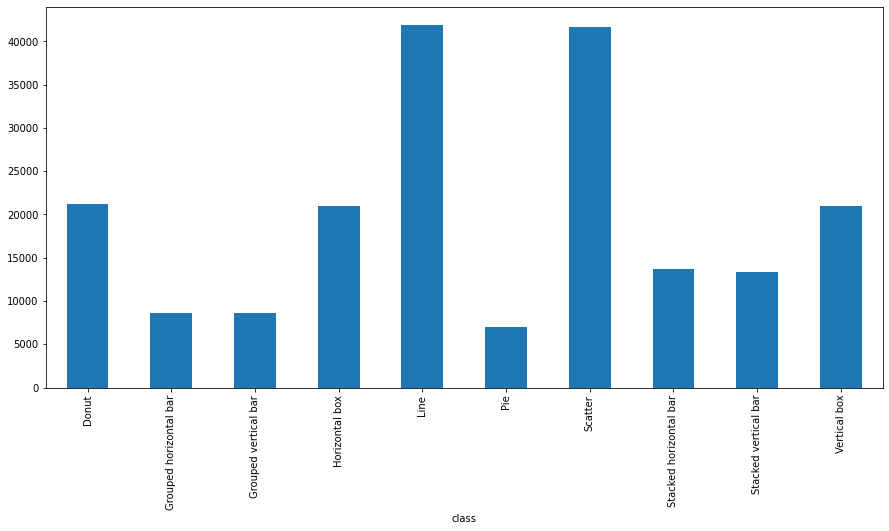

In [142]:
fig, ax = plt.subplots(figsize=(15,7))
df.groupby(['class']).count()['id'].plot.bar(ax=ax)

In [143]:
vert_boxes = df[df['class'] == 'Vertical box']

In [144]:
vert_boxes.head()

,id,class
6,148134,Vertical box
12,140647,Vertical box
30,142367,Vertical box
37,128359,Vertical box
63,147180,Vertical box


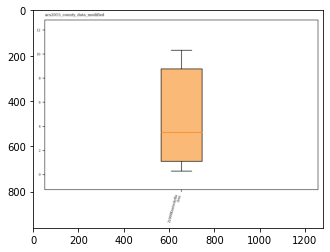

In [148]:
sample_vert_box = str(vert_boxes.iloc[10]['id']) + '.png'
img = mpimg.imread(IMAGES_DIR + sample_vert_box)
plt.imshow(img)